In [1]:
# To downlode the data
# !wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('drug200.csv')

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


Sex
M    104
F     96
Name: count, dtype: int64


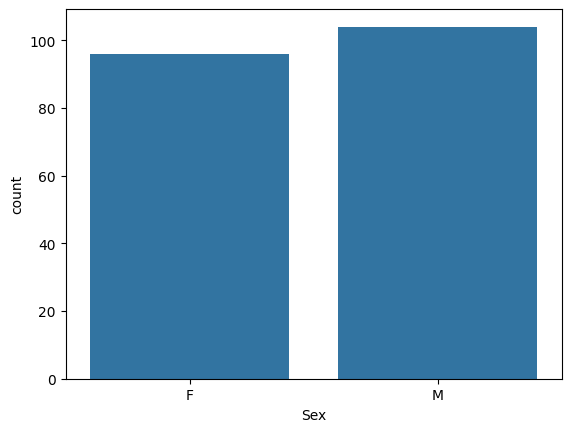

In [19]:
x=df['Sex'].value_counts()
print(x)
sns.countplot(data=df,x='Sex')
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


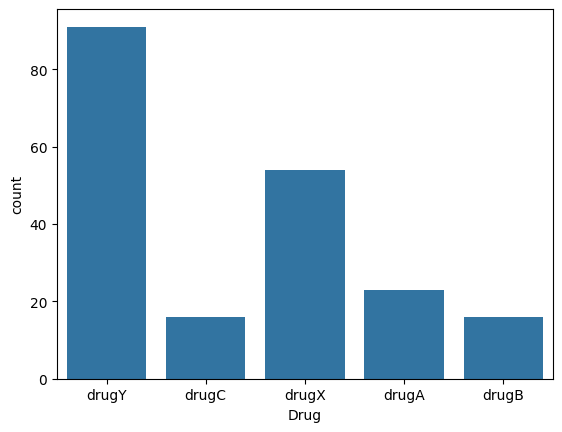

In [22]:
d=df['Drug'].value_counts()
print(d)
sns.countplot(data=df,x='Drug')
plt.show()

In [23]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18944\2958088175.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugY']['Age'],color='green',)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18944\2958088175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']== 'drugC']

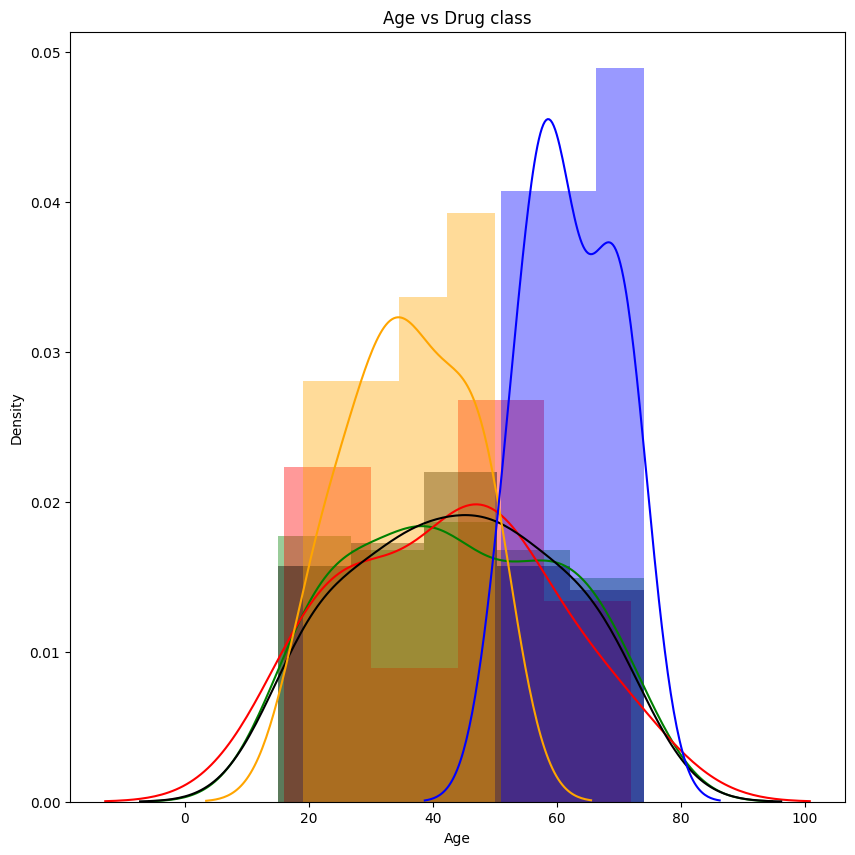

In [26]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug']== 'drugY']['Age'],color='green',)
sns.distplot(df[df['Drug']== 'drugC']['Age'],color='red',)
sns.distplot(df[df['Drug']== 'drugX']['Age'],color='black',)
sns.distplot(df[df['Drug']== 'drugA']['Age'],color='orange',)
sns.distplot(df[df['Drug']== 'drugB']['Age'],color='blue',)
plt.title("Age vs Drug class")
plt.show()

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
df['BP'].unique()
pbord=['HIGH', 'LOW', 'NORMAL']
ord=OrdinalEncoder()

In [35]:
df['BP']=ord.fit_transform(df[['BP']])

In [36]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,0.0,HIGH,25.355,drugY
1,47,M,1.0,HIGH,13.093,drugC
2,47,M,1.0,HIGH,10.114,drugC
3,28,F,2.0,HIGH,7.798,drugX
4,61,F,1.0,HIGH,18.043,drugY


In [37]:
print(df['Sex'].unique())
print(df['Cholesterol'].unique())
print(df['Drug'].unique())

['F' 'M']
['HIGH' 'NORMAL']
['drugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [38]:
df['Sex']=ord.fit_transform(df[['Sex']])
df['Cholesterol']=ord.fit_transform(df[['Cholesterol']])
df['Drug']=ord.fit_transform(df[['Drug']])

In [39]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0


In [40]:
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [41]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043


In [42]:
y.head()

0    4.0
1    2.0
2    2.0
3    3.0
4    4.0
Name: Drug, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [48]:
X_train.shape

(160, 5)

In [49]:
X_test.shape

(40, 5)

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=0)

In [52]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [53]:
ypred_gini=clf_gini.predict(X_test)

In [54]:
ypred_gini

array([3., 4., 3., 2., 4., 4., 4., 3., 0., 3., 0., 3., 4., 0., 1., 4., 1.,
       3., 2., 4., 1., 3., 3., 4., 4., 4., 2., 3., 4., 3., 4., 2., 2., 4.,
       0., 4., 3., 0., 4., 0.])

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(ypred_gini,y_test)

1.0

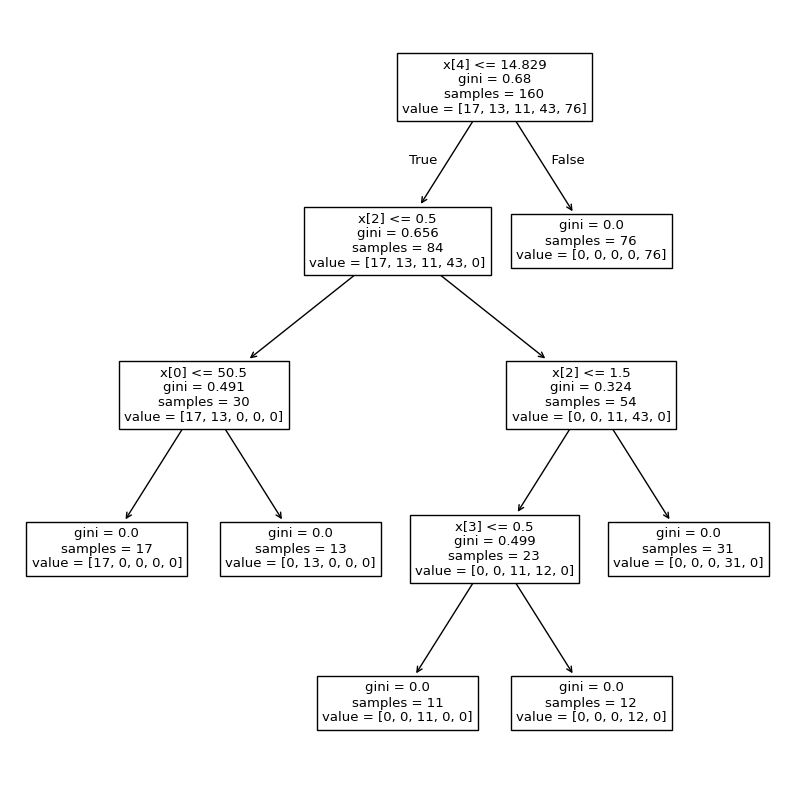

In [59]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(clf_gini.fit(X_train,y_train))
plt.show()

In [60]:
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [61]:
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [62]:
ypred_entropy=clf_entropy.predict(X_test)

In [63]:
accuracy_score(y_test,ypred_entropy)

0.875

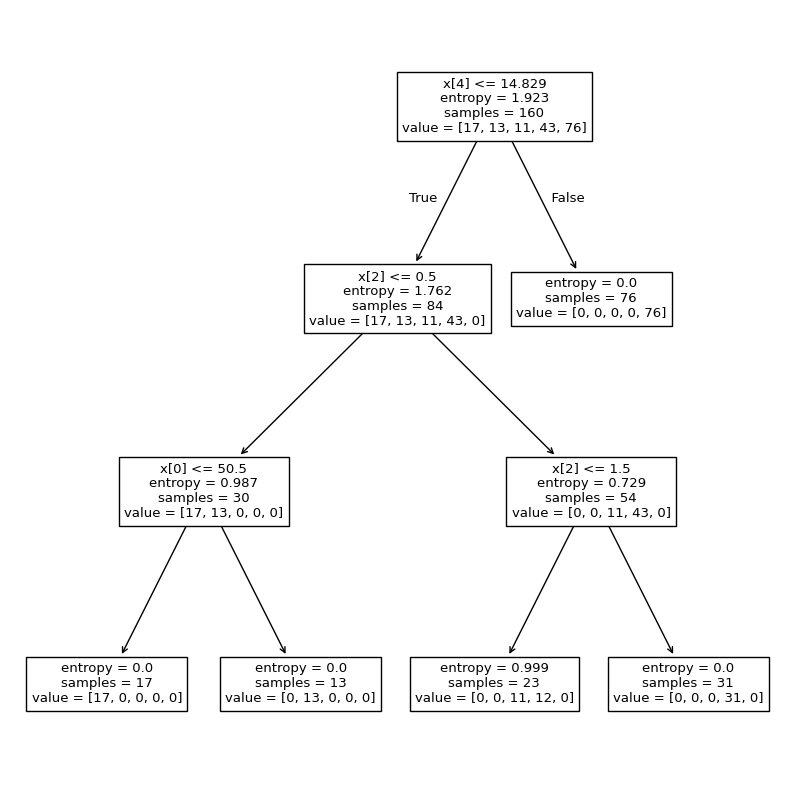

In [65]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train))
plt.show()